# Day 6: Support Vector Machines

In this exercise, you will be using support vector machines (SVMs) to build a spam classifier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
import scipy.io
import warnings
warnings.filterwarnings('ignore')

from sklearn import svm
from stemming.porter2 import stem
import nltk, nltk.stem.porter
import re

## 1 Support Vector Machines

In the first half of this exercise, you will be using support vector machines (SVMs) with various example 2D datasets. Experimenting with these datasets will help you gain an intuition of how SVMs work and how to use a Gaussian
kernel with SVMs. In the next half of the exercise, you will be using support vector machines to build a spam classifier.

### 1.1 Example Dataset 1

We will begin by with a 2D example dataset which can be separated by a
linear boundary. 

In [2]:
data = scipy.io.loadmat('data/ex6data1.mat')

# NOT inserting a column of 1's in case SVM software does it for me automatically
X, y = data['X'], data['y']
print(X.shape)
print(X[:5])
print(y.shape)
print(y[:5])

# Divide the sample into two: one with positive classification, another with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
print(pos.shape, neg.shape)

(51, 2)
[[ 1.9643  4.5957]
 [ 2.2753  3.8589]
 [ 2.9781  4.5651]
 [ 2.932   3.5519]
 [ 3.5772  2.856 ]]
(51, 1)
[[1]
 [1]
 [1]
 [1]
 [1]]
(21, 2) (30, 2)


In [3]:
def plotData():
    plt.plot(pos[:, 0], pos[:, 1], 'k+', label='Positive Sample')
    plt.plot(neg[:, 0], neg[:, 1], 'yo', label='Negative Sample')
    plt.xlabel('Column 1 Variable')
    plt.ylabel('Column 2 Variable')
    plt.legend(loc=4)

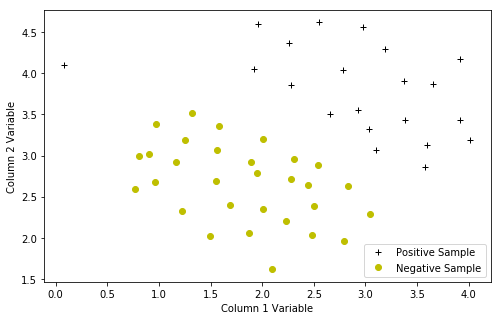

In [4]:
plotData()

In [5]:
# Draw the SVM boundary
def plotBoundary(svm, xmin, xmax, ymin, ymax):
    """
    Function to plot the decision boundary for a trained SVM
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the SVM classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    xvals = np.linspace(xmin, xmax, 100)
    yvals = np.linspace(ymin, ymax, 100)
    zvals = np.zeros((len(xvals), len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            zvals[i][j] = float(svm.predict(np.array([xvals[i], yvals[j]]).reshape(1, -1)))
    zvals = zvals.transpose()
    
    u, v = np.meshgrid(xvals, yvals)
    contour = plt.contour(xvals, yvals, zvals, [0])
    plt.title("Decision Boundary")

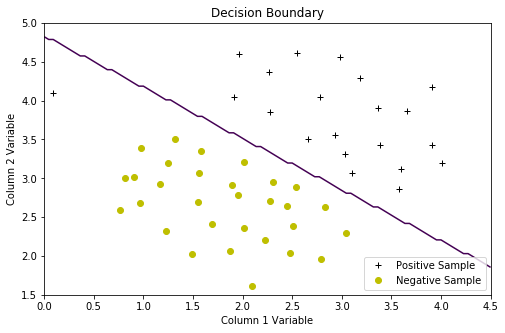

In [6]:
# SVM Decision Boundary with C = 1
linear_svm = svm.SVC(C=1, kernel='linear')
linear_svm.fit(X, y)
plotData()
plotBoundary(linear_svm, 0, 4.5, 1.5, 5)

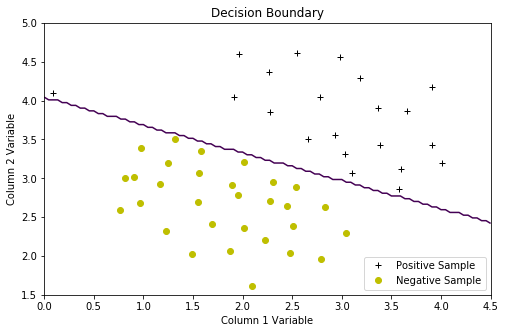

In [7]:
# SVM Decision Boundary with C = 100
linear_svm = svm.SVC(C=100, kernel='linear')
linear_svm.fit(X, y)
plotData()
plotBoundary(linear_svm, 0, 4.5, 1.5, 5)

### 1.2 SVM with Gaussian Kernels

In this part of the exercise, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable.

#### 1.2.1 Gaussian Kernel

The Gaussian kernel function is defined as:
$$K_{gaussian}(x^{(i)}, x^{(j)}) = exp\left(-\frac{||x^{(i)} -  x^{(j)}||^2}{2\sigma^2} \right) = exp\left(-\frac{\sum^n_{k=1}(x_k^{(i)} - x_k^{(j)})^2}{2\sigma^2} \right)$$

In [8]:
def gaussianKernel(x1, x2, sigma=2):
    norm = (x1-x2).T.dot(x1-x2)
    return np.exp(-norm/(2*sigma**2))

In [9]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])

gaussianKernel(x1, x2)

0.32465246735834974

### 1.2.2 Example Dataset 2

In [10]:
data2 = scipy.io.loadmat('data/ex6data2.mat')

# NOT inserting a column of 1's in case SVM software does it for me automatically
X, y = data2['X'], data2['y']
print(X.shape)
print(X[:5])
print(y.shape)
print(y[:5])

# Divide the sample into two: one with positive classification, another with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
print(pos.shape, neg.shape)

(863, 2)
[[ 0.107143   0.60307  ]
 [ 0.093318   0.649854 ]
 [ 0.0979263  0.705409 ]
 [ 0.15553    0.784357 ]
 [ 0.210829   0.866228 ]]
(863, 1)
[[1]
 [1]
 [1]
 [1]
 [1]]
(480, 2) (383, 2)


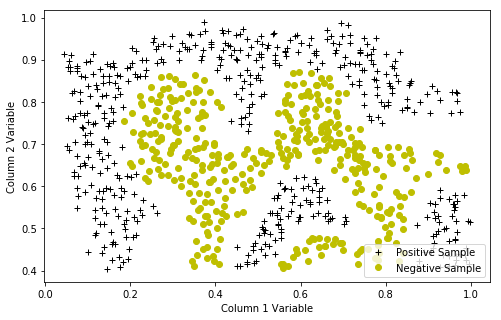

In [11]:
plotData()

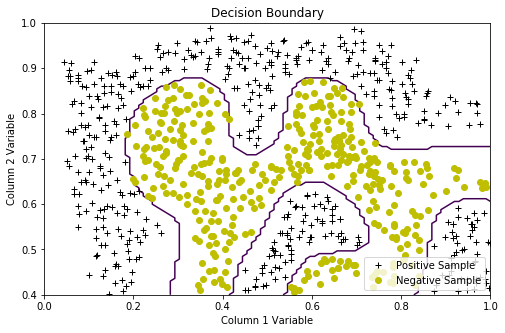

In [12]:
# Train the SVM with the Gaussian kernel on this dataset.
sigma = 0.1
gamma = np.power(sigma,-2.)
gaus_svm = svm.SVC(C=1, kernel='rbf', gamma=gamma)
gaus_svm.fit(X, y.flatten())
plotData()
plotBoundary(gaus_svm, 0, 1, .4, 1.0)

The decision boundary is able to separate most of the positive and negative examples correctly and follows the contours of the dataset well.

### 1.2.3 Example Dataset 3

In this part of the exercise, you will gain more practical skills on how to use a SVM with a Gaussian kernel.

In [13]:
data3 = scipy.io.loadmat('data/ex6data3.mat')

# NOT inserting a column of 1's in case SVM software does it for me automatically
X, y = data3['X'], data3['y']
Xval, yval = data3['Xval'], data3['yval']
print(X.shape)
print(X[:5])
print(y.shape)
print(y[:5])
print()
print(Xval.shape, yval.shape)
print()
# Divide the sample into two: one with positive classification, another with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
print(pos.shape, neg.shape)

(211, 2)
[[-0.158986  0.423977]
 [-0.347926  0.47076 ]
 [-0.504608  0.353801]
 [-0.596774  0.114035]
 [-0.518433 -0.172515]]
(211, 1)
[[1]
 [1]
 [1]
 [1]
 [1]]

(200, 2) (200, 1)

(106, 2) (105, 2)


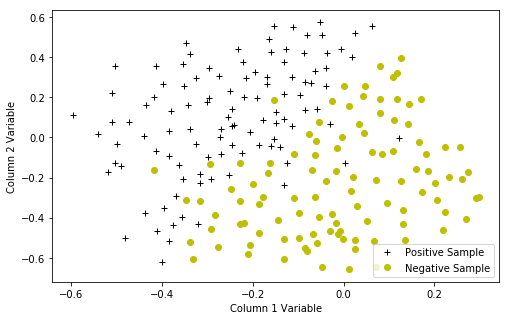

In [14]:
plotData()

In [15]:
Cs = (0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.)
sigmas = Cs
best_pair, best_score = (0, 0), 0

for C in Cs:
    for sigma in sigmas:
        gamma = np.power(sigma, -2.)
        gaus_svm = svm.SVC(C=C, kernel='rbf', gamma=gamma)
        gaus_svm.fit(X, y.flatten())
        score = gaus_svm.score(Xval, yval)
        if score > best_score:
            best_score = score
            best_pair = (C, sigma)

print("Best (C, sigma) is ({:.2f}, {:.2f}) with a score of {:.2f}".format(best_pair[0], best_pair[1], best_score))

Best (C, sigma) is (0.30, 0.10) with a score of 0.96


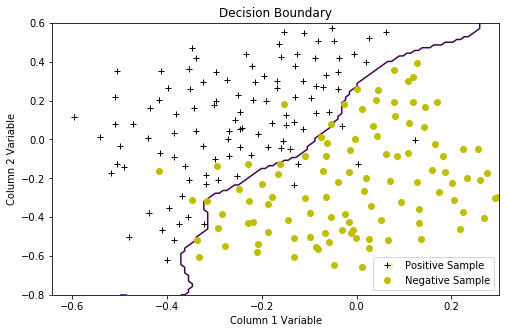

In [16]:
gaus_svm = svm.SVC(C=best_pair[0], kernel='rbf', gamma=np.power(best_pair[1],-2.))
gaus_svm.fit(X, y.flatten())
plotData()
plotBoundary(gaus_svm, -.5, .3, -.8, .6)

## 2 Spam Classification

Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the exercise, you will use SVMs to build your own spam filter.

You will be training a classifier to classify whether a given email, x, is spam (y = 1) or non-spam (y = 0). In particular, you need to convert each email into a feature vector $x\in R^n$. The following parts of the exercise will
walk you through how such a feature vector can be constructed from an
email.

### 2.1 Preprocessing Emails

In [17]:
print("emailSample1.txt:")
print('*'*13)
!cat data/emailSample1.txt

emailSample1.txt:
*************
> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com



In [18]:
def preProcess(email):
    '''Function to do some pre processing (simplification of e-mails).'''
    # Lower-casing: The entire email is converted into lower case,
    # so that captialization is ignored.
    email = email.lower()
    
    # Stripping HTML: All HTML tags are removed from the emails,
    # so that only the content remains.
    email = re.sub('<[^<>]+>', ' ', email)
    
    # Normalizing URLs: All URLs are replaced with the text "httpaddr".
    email = re.sub('(http|https)://[^\s]*', 'httpaddr', email)
    
    # Normalizing Email Addresses: All email addresses are replaced
    # with the text "emailaddr".
    email = re.sub('[^\s]+@[^\s]+', 'emailaddr', email)
    
    # Normalizing Numbers: All numbers are replaced with the text "number".
    email = re.sub('[0-9]+', 'number', email)
    
    # Normalizing Dollars: All dollar signs ($) are replaced with the text "dollar".
    email = re.sub('[$]+', 'dollar', email)
    
    return email

In [19]:
def email2TokenList(raw_email):
    '''
    Function that takes in preprocessed (simplified) email, tokenizes it,
    stems each word, and returns an (ordered) list of tokens in the e-mail.
    '''
    # Word Stemming: Words are reduced to their stemmed form.
    # Using the NLTK stemmer.
    stemmer = nltk.stem.porter.PorterStemmer()
    
    email = preProcess(raw_email)
    
    # Split the email into individual words by white space, delimiters '@', '$', '/', etc.
    tokens = re.split('[ \@\$\/\#\.\-\:\&\*\+\=\[\]\?\!\(\)\{\}\,\'\"\>\_\<\;\%]', email)
    
    # Loop over each word (token) and use a stemmer to shorten it,
    # then check if the word is in the vocab_list... if it is,
    # store what index in the vocab_list the word is.
    tokenList = []
    for token in tokens:
        # Remove any non alphanumeric characters.
        token = re.sub('[^a-zA-Z0-9]', '', token)
        
        # Use the Porter stemmer to stem the word.
        stemmed = stemmer.stem(token)
        
        # Throw out empty tokens.
        if not len(token): continue
        
        # Store a list all unique stemmed words.
        tokenList.append(stemmed)
        
    return tokenList

#### 2.1.1 Vocabulary List

After preprocessing the emails, we have a list of words for each email. The next step is to choose which words we would like to use in our classifier and which we would want to leave out.

In [20]:
def getVocabDict(reverse=False):
    '''Function to read in the supplied vocab list text file into a dictionary.'''
    vocab_dict = {}
    with open('data/vocab.txt') as f:
        for line in f:
            (val, key) = line.split()
            if not reverse:
                vocab_dict[key] = int(val)
            else:
                vocab_dict[int(val)] = key
    return vocab_dict

In [21]:
def email2VocabIndices(raw_email, vocab_dict):
    """
    Function that takes in a raw email and returns a list of indices corresponding
    to the location in vocab_dict for each stemmed word in the email.
    """
    tokenList = email2TokenList(raw_email)
    index_list = [vocab_dict[token] for token in tokenList if token in vocab_dict]
    return index_list

### 2.2 Extracting Features from Emails

You will now implement the feature extraction that converts each email into a vector in $R^n$.

In [22]:
def email2FeatureVector(raw_email, vocab_dict):
    """
    Function that takes as input a raw email, and returns a vector of shape
    (n,1) where n is the size of the vocab_dict.
    The first element in this vector is 1 if the vocab word with index == 1
    is in the raw_email, 0 otherwise.
    """
    n = len(vocab_dict)
    result = np.zeros((n,1))
    vocab_indices = email2VocabIndices( email_contents, vocab_dict )
    for idx in vocab_indices:
        result[idx] = 1
    return result

In [23]:
vocab_dict = getVocabDict()
email_contents = open('data/emailSample1.txt', 'r').read()
test_fv = email2FeatureVector(email_contents, vocab_dict)

print("Length of feature vector is %d" % len(test_fv))
print("Number of non-zero entries is %d" % sum(test_fv==1))

Length of feature vector is 1899
Number of non-zero entries is 45


### 2.3 Training SVM for Spam Classification

After you have completed the feature extraction functions, the next step will load a preprocessed training dataset that will be used to train a SVM classifier.

After loading the dataset, you will proceed to train a SVM to classify between spam (y = 1) and non-spam (y = 0) emails. Once the training completes, you should see that the classifier gets a training accuracy of about 99.8% and a test accuracy of about 98.5%.

In [24]:
# Training set
data_train = scipy.io.loadmat('data/spamTrain.mat')
X, y = data_train['X'], data_train['y']

# Test set
data_test = scipy.io.loadmat('data/spamTest.mat')
X_test, y_test = data_test['Xtest'], data_test['ytest']

# Divide the sample into two: one with positive classification, another with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

print(X.shape, y.shape)
print('-'*13)
print(X_test.shape, y_test.shape)

(4000, 1899) (4000, 1)
-------------
(1000, 1899) (1000, 1)


In [25]:
# Build the SVM model with C = 0.1.
linear_svm = svm.SVC(C=0.01, kernel='linear')
linear_svm.fit(X, y)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
# Prediction on trainning set.
train_predictions = linear_svm.predict(X).reshape((y.shape[0], 1))
train_acc = 100. * float(sum(train_predictions == y))/y.shape[0]
print('Training accuracy = {:.2f}'.format(train_acc))

# Prediction on test set.
test_predictions = linear_svm.predict(X_test).reshape((y_test.shape[0], 1))
test_acc = 100. * float(sum(test_predictions == y_test))/y_test.shape[0]
print('Test set accuracy = {:.2f}'.format(test_acc))

Training accuracy = 98.33
Test set accuracy = 98.00


### 2.4 Top Predictions for Spam

To better understand how the spam classifier works, we can inspect the parameters to see which words the classifier thinks are the most predictive of spam.

In [27]:
vocab_dict_flipped = getVocabDict(reverse=True)

# Sort indicies from most important to least-important (high to low weight).
sorted_indices = np.argsort(linear_svm.coef_, axis=None )[::-1]
print("The 15 most important words to classify a spam e-mail are:")
print([vocab_dict_flipped[x] for x in sorted_indices[:15]])
print()
print("The 15 least important words to classify a spam e-mail are:")
print([vocab_dict_flipped[x] for x in sorted_indices[-15:]])
print()

# Most common word (mostly to debug):
most_common_word = vocab_dict_flipped[sorted_indices[0]]
print('The number of spam containing \"{}\" = {}/{} = {:.2f}%'.format(
    most_common_word, sum(pos[:,1190]), pos.shape[0],
    100.*float(sum(pos[:,1190]))/pos.shape[0]))
print('The number of NON spam containing \"{}\" = {}/{} = {:.2f}%'.format(
    most_common_word, sum(neg[:,1190]), neg.shape[0],
     100.*float(sum(neg[:,1190]))/neg.shape[0]))

The 15 most important words to classify a spam e-mail are:
['clearli', 'remot', 'base', 'otherwis', 'herba', 'player', 'gt', 'young', 'york', 'natur', 'hot', 'next', 'visa', 'weblog', 'franc']

The 15 least important words to classify a spam e-mail are:
['useless', 'august', 'subscrib', 'predict', 'linux', 'thank', 'numberth', 'issu', 'that', 'razornumb', 'spam', 'datapow', 'urgent', 'wrong', 'http']

The number of spam containing "clearli" = 804/1277 = 62.96%
The number of NON spam containing "clearli" = 301/2723 = 11.05%
